# Exploration 3 카메라 스티커앱 만들기

## 과제 요구사항
1. 볼은 '턱', '눈', '입', '코' 사이에 있다는 점을 이용해 주세요. 비율로 계산하는 방법 잊지 않으셨죠?
hint 2, 36, 48, 30 번 인덱스를 이용
- 수염이라 그냥 코에 반영
2. 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.
- 네~
3. 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다.
hint opencv 의 cv2.addWeighted() 를 참고하세요.
- 맨 마지막 부분 코드에서 반영하여 보았으나 수염의 배경이 흰색이라 지저분하게 나와서 미사용 및 주석처리
4. 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.
- 네 왼쪽 오른쪽 방향 사진 사용시 dlib.get_frontal_face_detector()가 렉탱글을 못잡아 주더군요
- 다른 라이브러리를 사용해 보려하였지만 리턴값이랑 달라 능숙치 못한 저로써는 사용실패
5. 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!
    오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.      
    * 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?      
         얼굴의 각도에 따라 스티커의 각도를 틀어서 표현하면 더 자연스럽겠지만   
         구현은 안됬습니다
    * 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?   
        너무 작아져서 특징을 잘 잡을수 없음, 누우면 눈,코,입이 인식이 잘 안됨   
    * 실행 속도가 중요할까요?    
         네 현존하는 많은 카메라 앱들이 실시간으로 얼굴을 잡고 스티커를 붙여줍니다 버벅이면 안되겠죠   
    * 스티커앱을 만들 때 정확도가 얼마나 중요할까요?   
         일반적으로는 장난이기때문에 대충해도 되지만 요새 웹캠러들의 실시간 뽀샵화면보정기술을           보면 순식간에 고객을 잃을수 있으므로 중요한 곳도 있다

나중 다른 환경에서 할 염려용 명령어

In [5]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 #차후 다른 환경에서 구현시 사용될 명령어
!mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
!cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

--2021-10-01 09:58:44--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  35.3MB/s    in 1.7s    

2021-10-01 09:58:46 (35.3 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file ./models/shape_predictor_68_face_landmarks.dat already exists.


## 코드코드

rectangles[[(216, 118) (439, 341)]]
(327, 225)
(x,y) : (327,113)
(w,h) : (224,224)
(x,y) : (215,113)


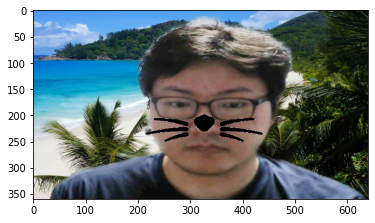

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/11.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #bgr2rgb

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

# 렉탱글과 랜드마크 확인 과정
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

#img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) #렉탱글 반영이미지

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) #렉탱글과 랜드마크 반영이미지

#얼굴 이미지에서 코 중심점인 랜드마크 30의 좌표를 기준으로 수염이 들어가야할 좌표 계산
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

#수염 이미지를 불러와서 렉탱글의 폭(x크기)으로 리사이즈
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

#스티커 이미지 시작점 조정
refined_x = x - w // 2  # 시작점이 x가 되게되면 수염 왼쪽끝이 위치에 감으로 수염 중앙이 되도록 폭의 절반빼기
refined_y = y # 코 높이(landmark[30][1])

print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) # 좌표확인

#print(img_sticker.shape[0],img_sticker.shape[1])
#print(sticker_area.shape,img_sticker.shape) 중간과정에서 형태확인

#원본 img_bgr에 스티커 적용
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
#sticker_area = cv2.addWeighted(sticker_area, 1.0, img_sticker, 0.1, 0) #(이미지1,투명도,이미지2,투명도) 
# 반투명하게 반영하려 했지만 수염의 뒷배경이 흰색인 바람에 너져분해서 뻄
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) 
#where(불린판별식, 참일경우 반환값, 거짓일경우 반환값) .astype(uint8(양수0~255)값으로 변환)
#sticker_area, img_sticker, img_bgr내부편집범위, 이 셋의 크기는 같아야한다 꼭!

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 진행 고통록
- 내사진으로(image,3,4,5) 진행했지만 컴터가 얼굴을 못찾음 ㅠ   
- jpg to png 한것이 문제일까 뭘까   
- 일단 익스 저자분의 사진(image1)으로 코드진행   
- 실행은 완료   
- jpg로 진행해봤으나 못찾음 내가 사람이 아니라 컴퓨터가 못찾는건가
- 가위바위보때 사진찍기 사이트를 이용해 224x224라 저자분 사진 800x450에비해 축소가 아닌 확대를 했다는걸 깨닳음   
- 해상도 높은 사진을 찍음   
- 이번 것은 1130x838    
- 동작합니다 저도 사람이 되었습니다 여러분   
- 바로 옆 얼굴 사진도 시도하였으나 바로 사람이 아니게 되었다
- opencv 렉탱글이 후진거 같다 다른 얼굴 찾기를 고민해보자
- 렉탱글이아니라 디텍터가 문제였다 dlib.get_frontal_face_detector() -애초에 앞얼굴 디텍터였던 것이다
- 일단 고양이 수염부터 달기로 했다
- 엄청난 시행 착오 끝에 refined_x,y와 sticker_area, img_bgr에서의 차원이 연동되야함을 배우고
- 고양이 수염 배경이 하얗기때문에 반대로 수염부분에만 반영하게 where에 255값을 넣음


## 회고
어 진행고통록에 거의다 남겼기 때문에 특별한건 없지만 슬슬 어려워 가는 느낌이네요   
수치가 연관되어있어 수치를 변경해도  에러를 뿜어내서 찾는데 오래 걸렸습니다.   
역시 함수의 내부를 봐서 입출력 변수를 알아둬야 모르는 것도 쓸수 있을거 같네요